<a href="https://colab.research.google.com/github/r0b0tAstronaut/BioInformatics-Project/blob/master/model_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

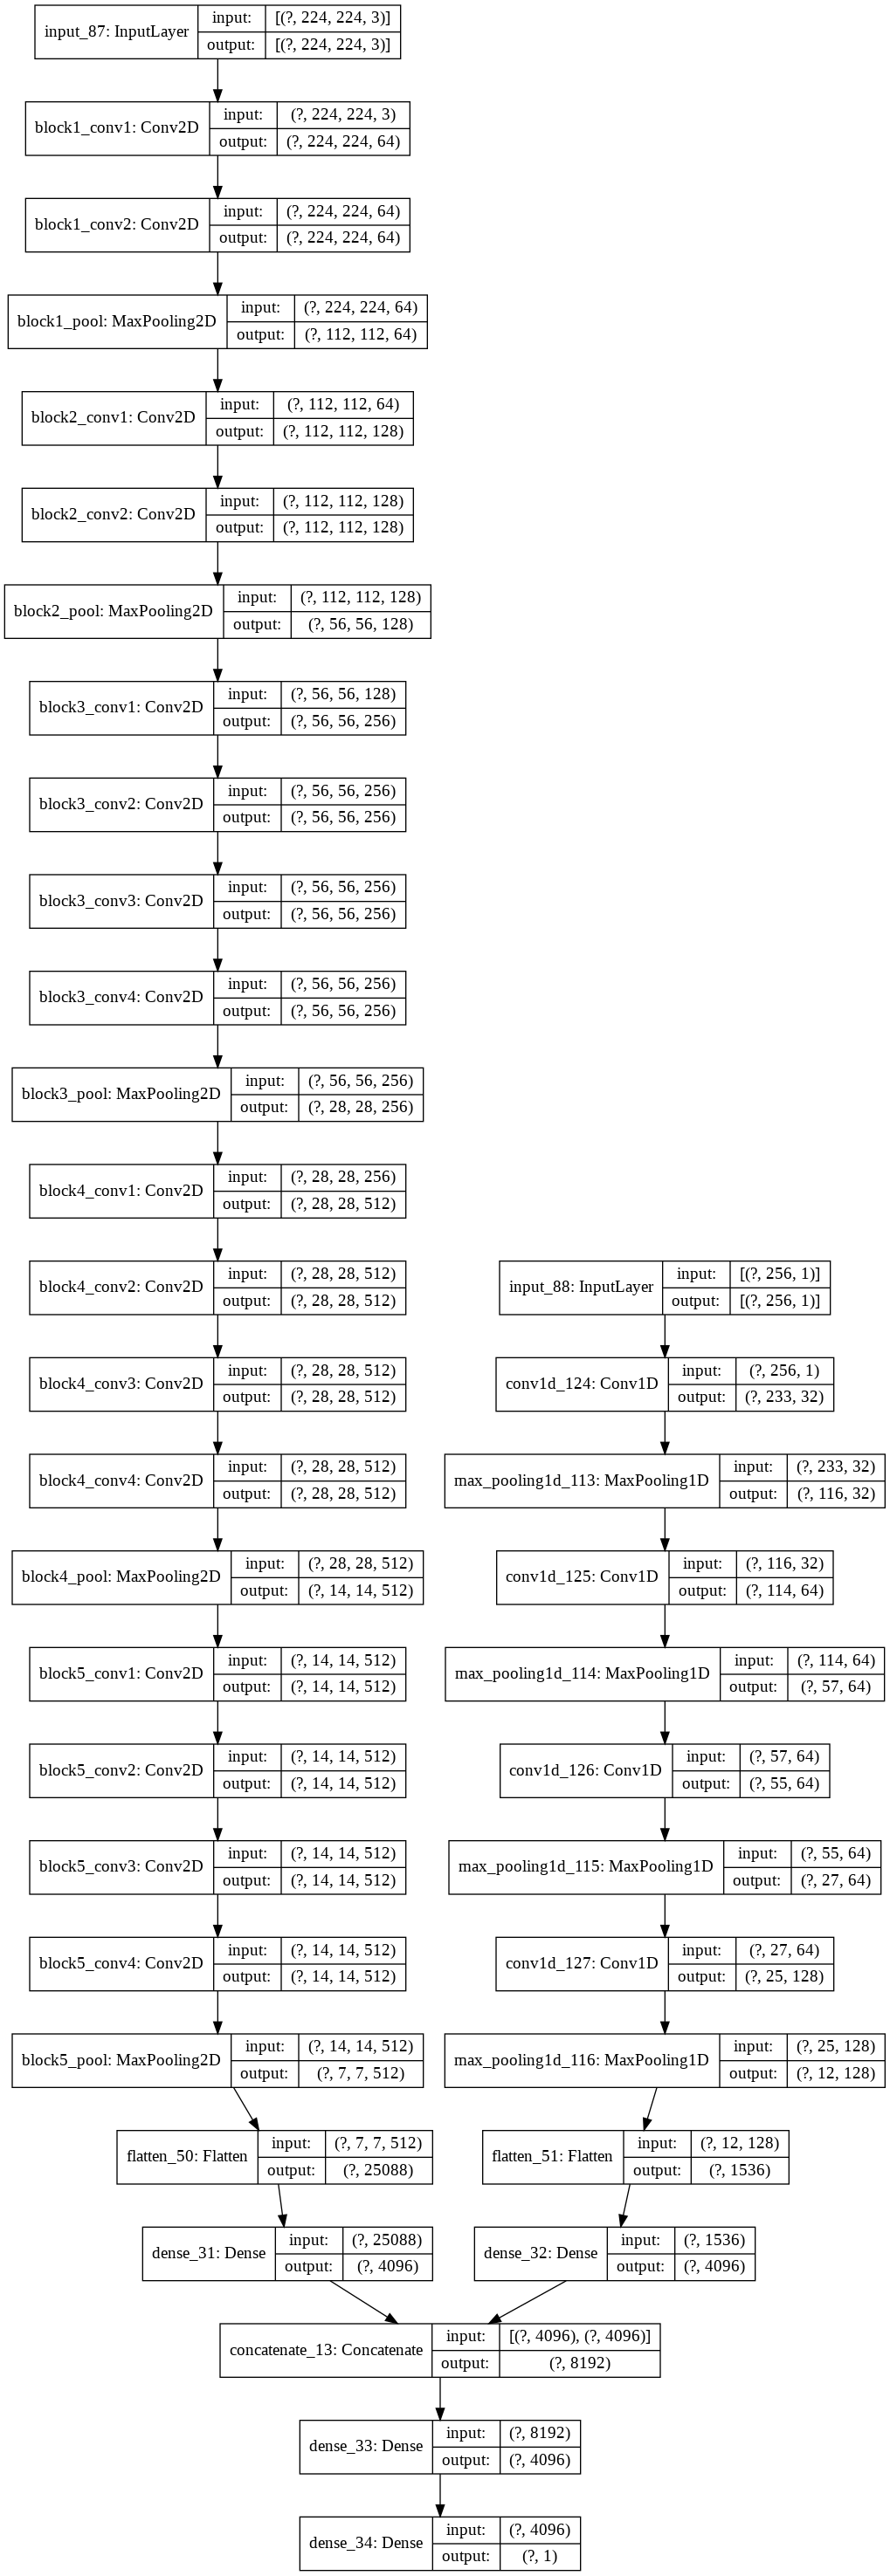

In [54]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv1D, Conv2D, BatchNormalization, MaxPool1D, Concatenate
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

# build the imag CNN
vgg = VGG19(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3)
)
img_base = vgg.output
img_base = Flatten()(img_base)
img_base = Dense(4096)(img_base)

# Build the hyperspec 1DCNN
hyperspec_input = Input(shape=(256, 1))
hyperspec_base = Conv1D(filters=32, kernel_size=24, strides=1, padding='valid')(hyperspec_input)
hyperspec_base = MaxPool1D(pool_size=2, strides=None)(hyperspec_base)
hyperspec_base = Conv1D(filters=64, kernel_size=3, strides=1, padding='valid')(hyperspec_base)
hyperspec_base = MaxPool1D(pool_size=2, strides=None)(hyperspec_base)
hyperspec_base = Conv1D(filters=64, kernel_size=3, strides=1, padding='valid')(hyperspec_base)
hyperspec_base = MaxPool1D(pool_size=2, strides=None)(hyperspec_base)
hyperspec_base = Conv1D(filters=128, kernel_size=3, strides=1, padding='valid')(hyperspec_base)
hyperspec_base = MaxPool1D(pool_size=2, strides=None)(hyperspec_base)
hyperspec_base = Flatten()(hyperspec_base)
hyperspec_base = Dense(4096)(hyperspec_base)

# Combine the feature maps
combined = Concatenate()([img_base, hyperspec_base])
z = Dense(4096)(combined)
z = Dense(1)(z)

# Create the full model
full_model = Model([vgg.input, hyperspec_input], z)
plot_model(full_model, show_shapes=True, show_layer_names=True)